In [1]:
import os
import sys
sys.path.append(os.path.abspath('.'))
sys.path.append(os.path.abspath(r'./.'))

In [2]:
%pwd

'/home/borela/fontes/exqa-complearning/source/calculation/comparison'

In [3]:
%cd ../../..

/home/borela/fontes/exqa-complearning


In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
import scipy.stats as stat


In [7]:
import seaborn as sns

In [8]:

# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos (+ e -) como np.NaN
pd.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
# %matplotlib notebook

# Tamanho padrão das figuras
figsize=(10,6)

pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)


In [9]:
%matplotlib inline


In [10]:
from source.data_related import squad_related

/home/borela/miniconda3/envs/exqa-complearning/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
squad_dataset_en = squad_related.load_squad_dataset_1_1(parm_language='en')
squad_dataset_pt = squad_related.load_squad_dataset_1_1(parm_language='pt')

squad_columns_remove = ['title','context','question','answer_start','answer_text']

df_squad_en = squad_dataset_en.df
df_squad_en['ind_language'] = 'en'
df_squad_en.drop(columns=squad_columns_remove, axis=1, inplace=True)

df_squad_pt = squad_dataset_pt.df
df_squad_pt['ind_language'] = 'pt'
df_squad_pt.drop(columns=squad_columns_remove, axis=1, inplace=True)


Using custom data configuration default-d2cdb99fa46933e9
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-d2cdb99fa46933e9/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 836.35it/s]
Using custom data configuration default-61eba6f0d4a86c5d
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-61eba6f0d4a86c5d/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 744.46it/s]


In [14]:
from source.data_related import rastro_evaluation_qa


In [18]:
import importlib
importlib.reload(rastro_evaluation_qa)

<module 'source.data_related.rastro_evaluation_qa' from '/home/borela/fontes/exqa-complearning/source/data_related/rastro_evaluation_qa.py'>

In [20]:
rastro_eval_qa = rastro_evaluation_qa.RastroEvaluationQa()

In [23]:
df_eval_qa_col = rastro_eval_qa.df_eval_metric_col

In [21]:
df_eval_qa_line = rastro_eval_qa.df_eval_metric_line

In [24]:
df_eval_qa_col.iloc[-1]

cod                                             38
name_learning_method                       context
ind_language                                    pt
name_model                     EleutherAI/gpt-j-6B
time_execution_total                         10828
time_execution_per_question                   1024
num_max_answer_length                           80
cod_prompt_format                            103.0
EM                                           40.81
EM@3                                          45.9
F1                                           53.37
F1@3                                         61.37
num_shot                                       2.0
ind_format_example                            tptp
ind_language_prompt                             en
Name: 24, dtype: object

In [25]:
df_calculated_metric_per_question, df_metric_question_squad = rastro_evaluation_qa.load_metric_per_question()


Using custom data configuration default-d2cdb99fa46933e9
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-d2cdb99fa46933e9/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 1051.99it/s]
Using custom data configuration default-61eba6f0d4a86c5d
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-61eba6f0d4a86c5d/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 1076.57it/s]


In [17]:
len(df_calculated_metric_per_question), len(df_metric_question_squad)

(1014704, 1014704)

In [18]:
df_metric_question_squad.iloc[1]

id                                                      56be4db0acb8001400a502ec
question_len_char                                                             52
context_len_char                                                             844
question_context_len_char                                                    896
question_type                                                            unknown
answer_mean_length                                                          14.0
answer_min_length                                                             14
answer_max_length                                                             14
answer_count                                                                   3
ind_language                                                                  pt
cod_evaluation                                                                14
cod_question                                            56be4db0acb8001400a502ec
cod_metric                  

In [18]:
df_metric_question_squad.head(2)

,id,question_len_char,context_len_char,question_context_len_char,question_type,answer_mean_length,answer_min_length,answer_max_length,answer_count,ind_language,cod_evaluation,cod_question,cod_metric,value_all,cod,name_learning_method,name_model,time_execution_total,time_execution_per_question,num_max_answer_length,cod_prompt_format,value_question,num_shot,ind_format_example
0,56be4db0acb8001400a502ec,52,844,896,unknown,14.0,14,14,3,pt,14,56be4db0acb8001400a502ec,EM,1.0,14,transfer,pierreguillou/bert-large-cased-squad-v1.1-port...,2632,249,80,NaN,72.20,NaN,None
1,56be4db0acb8001400a502ec,52,844,896,unknown,14.0,14,14,3,pt,14,56be4db0acb8001400a502ec,F1,1.0,14,transfer,pierreguillou/bert-large-cased-squad-v1.1-port...,2632,249,80,NaN,83.17,NaN,None


In [19]:
df_metric_question_squad.iloc[-1]

id                             5737aafd1c456719005744ff
question_len_char                                    65
context_len_char                                    749
question_context_len_char                           814
question_type                                      what
answer_mean_length                                  6.0
answer_min_length                                     6
answer_max_length                                     6
answer_count                                          5
ind_language                                         en
cod_evaluation                                       34
cod_question                   5737aafd1c456719005744ff
cod_metric                                         F1@3
value_all                                           0.0
cod                                                  34
name_learning_method                            context
name_model                          EleutherAI/gpt-j-6B
time_execution_total                            

In [27]:
colunas_fonte = [ 'question_type', 'ind_language', 'cod_metric', 'name_learning_method', 'name_model','cod_prompt_format', 'question_context_len_char']

colunas_objetivo = [ 
       'value_question'
]


In [28]:
df_metric_question_squad_en = df_metric_question_squad.query('ind_language=="en"')

In [29]:
df_metric_question_squad_pt = df_metric_question_squad.query('ind_language=="pt"')

In [30]:
fig = plt.figure(figsize=figsize)


<Figure size 720x432 with 0 Axes>

In [29]:

values_ = df_metric_question_squad.loc[:,['question_context_len_char','value_question']].values


In [ ]:

# cor (c) - passou a segunda coluna: cor é proporcional ao value_question.
# size (s) - proporcional à 1a coluna 
# alpha - transparência
# cmap - padrão de cores usado
plt.scatter(values_[:,0], values_[:,1], c=values_[:,1], s=values_[:,0]*100, alpha=0.3,
                   cmap='viridis')
# para mostrar barra de cores
plt.colorbar()
plt.xlabel('question_context_len_char')
plt.ylabel('value_question')
plt.title('question_context_len_char X value_question')
plt.grid(True) 
plt.show()

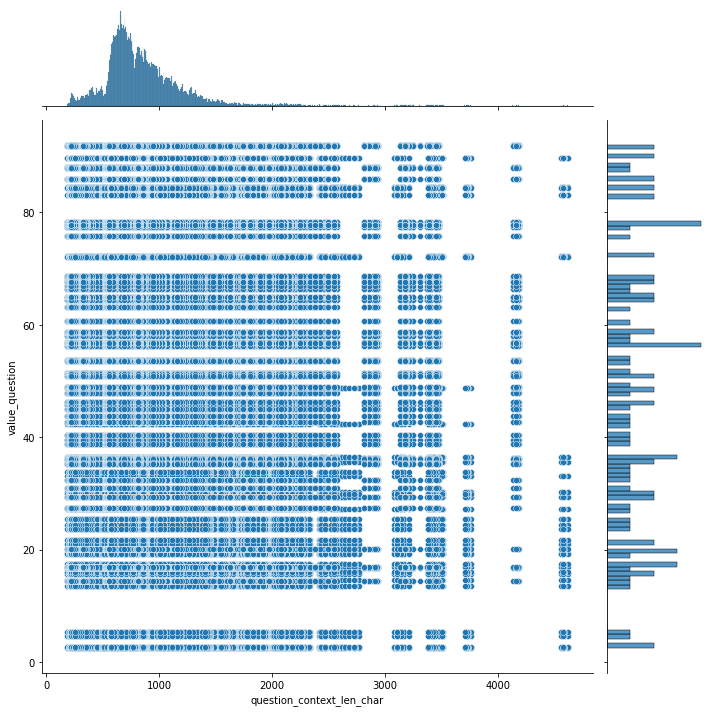

In [32]:
g = sns.jointplot(x=values_[:,0], y=values_[:,1], height=figsize[0]) # passa parâmetro da altura (quadrado)
g.set_axis_labels('question_context_len_char','value_question')
plt.tight_layout()

<AxesSubplot:ylabel='question_type'>

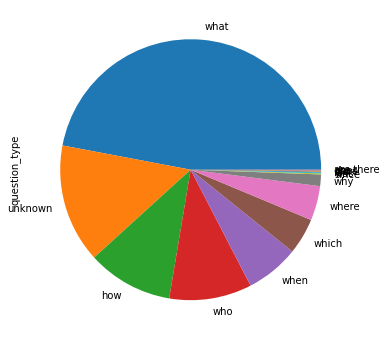

In [43]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
df_metric_question_squad_en.question_type.value_counts().plot(kind='pie', ax=ax)
pizza_total_question_per_type.png

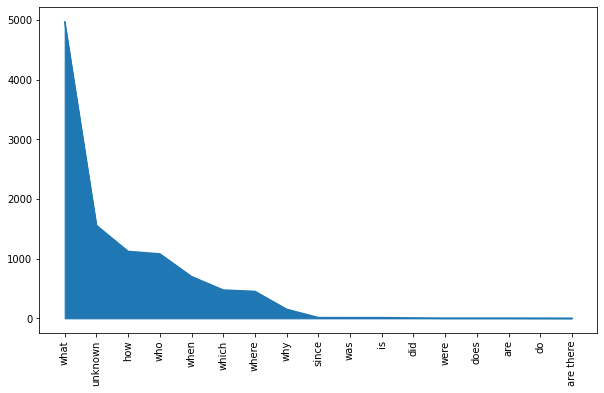

In [55]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
df_squad_en.question_type.value_counts().plot(kind='area', ax=ax)
contadores = df_squad_en.question_type.value_counts()
_ = plt.xticks(range(len(contadores)), contadores.index.values, rotation='vertical')
# area_total_question_per_type.png


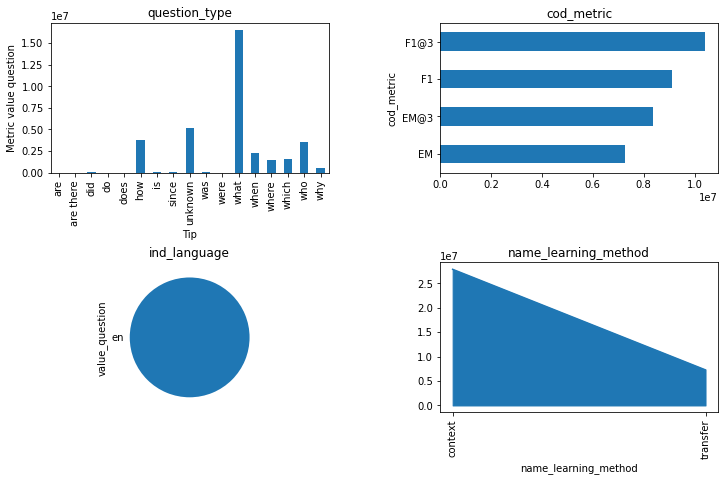

In [44]:
fig, ax = plt.subplots(2, 2, figsize=figsize)
#print(ax)
# para dar um espaço entre subfiguras
# não deixa espaço extra nas margens
plt.tight_layout()
df_= df_metric_question_squad_en.groupby('question_type')['value_question'].sum()
ax[0,0].set_ylabel('Metric value question')
df_.plot(kind='bar', ax=ax[0,0], title='question_type')
df_metric_question_squad_en.groupby('ind_language')['value_question'].sum().plot(kind='pie', ax=ax[1,0], title='ind_language')
ax[0,0].set_xlabel('Tip')
df_metric_question_squad_en.groupby('cod_metric')['value_question'].sum().plot(kind='barh', ax=ax[0,1], title='cod_metric')
df_metric_question_squad_en.groupby('name_learning_method')['value_question'].sum().plot(kind='area', ax=ax[1,1], title='name_learning_method')
contadores = df_metric_question_squad_en.name_learning_method.value_counts()
_ = plt.xticks(range(len(contadores)), contadores.index.values, rotation='vertical')
fig.subplots_adjust(hspace=0.6, wspace=0.4)

In [57]:
df_squad_en.columns

Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language'],
      dtype='object')

In [76]:
df_metric_question_squad_en.columns

Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language', 'cod_evaluation', 'cod_question', 'cod_metric',
       'value_all', 'cod', 'name_learning_method', 'name_model',
       'time_execution_total', 'time_execution_per_question',
       'num_max_answer_length', 'cod_prompt_format', 'value_question',
       'num_shot', 'ind_format_example', 'ind_language_prompt'],
      dtype='object')

In [79]:
dftemp = df_metric_question_squad_en.groupby(['question_context_len_char','answer_count'])['value_question'].mean()


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

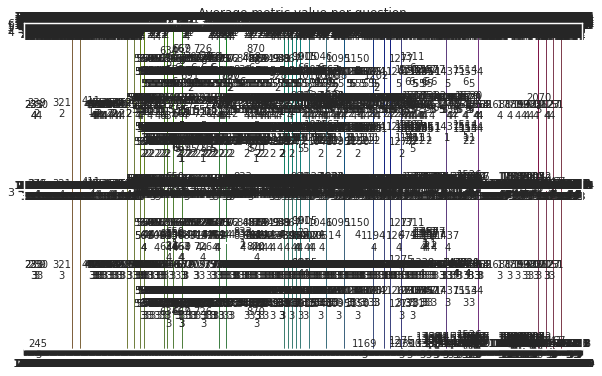

In [80]:

fig, ax = plt.subplots(1, 1, figsize=figsize)
_=mosaic(dftemp,  ax=ax, statistic=False, gap=0.01, title='Average metric value per question')


/home/borela/miniconda3/envs/exqa-complearning/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


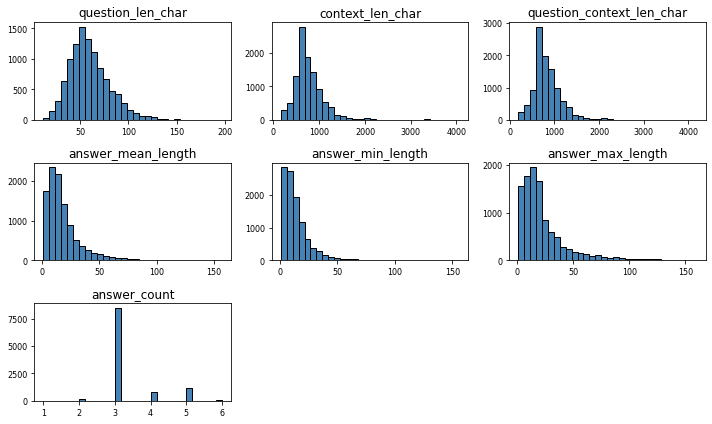

In [60]:
# Histograma dos dados

fig, ax = plt.subplots(1, 1, figsize=figsize)

df_squad_en.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()   

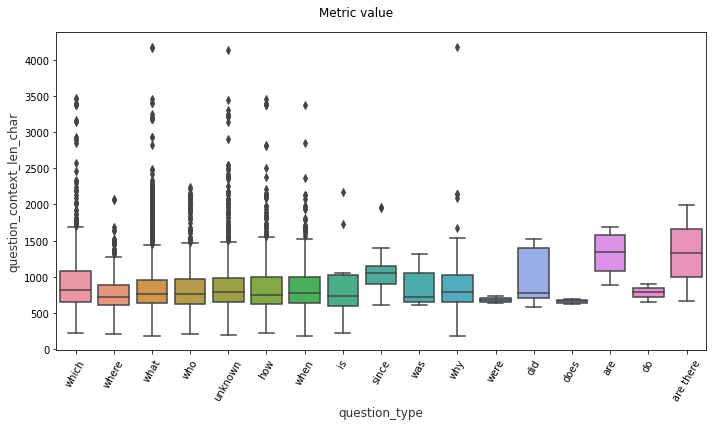

In [63]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value')

sns.boxplot(x="question_type", y="question_context_len_char", data=df_squad_en,  ax=ax)
ax.set_xlabel("question_type",size = 12,alpha=0.8)
ax.set_ylabel("question_context_len_char",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

In [67]:
df_metric_question_squad_en.columns

Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language', 'cod_evaluation', 'cod_question', 'cod_metric',
       'value_all', 'cod', 'name_learning_method', 'name_model',
       'time_execution_total', 'time_execution_per_question',
       'num_max_answer_length', 'cod_prompt_format', 'value_question'],
      dtype='object')

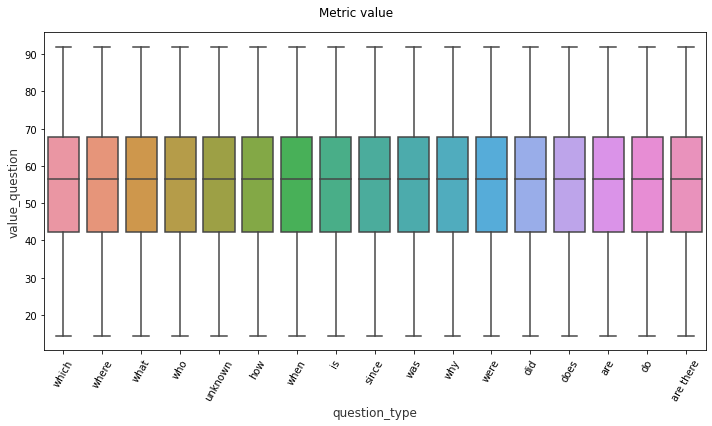

In [68]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value')

sns.boxplot(x="question_type", y="value_question", data=df_metric_question_squad_en,  ax=ax)
ax.set_xlabel("question_type",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

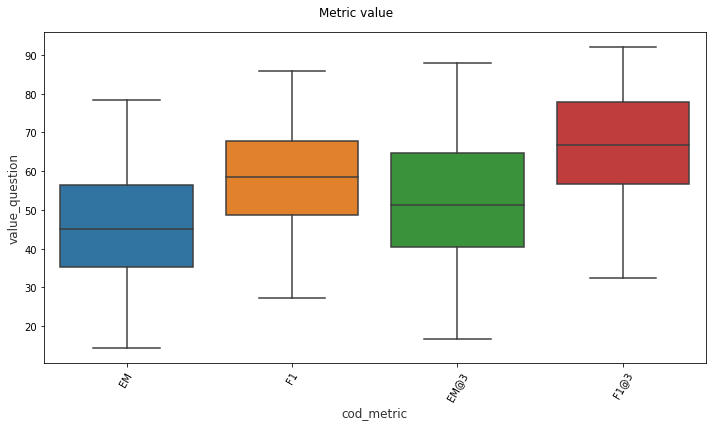

In [70]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value')

sns.boxplot(x="cod_metric", y="value_question", data=df_metric_question_squad_en,  ax=ax)
ax.set_xlabel("cod_metric",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

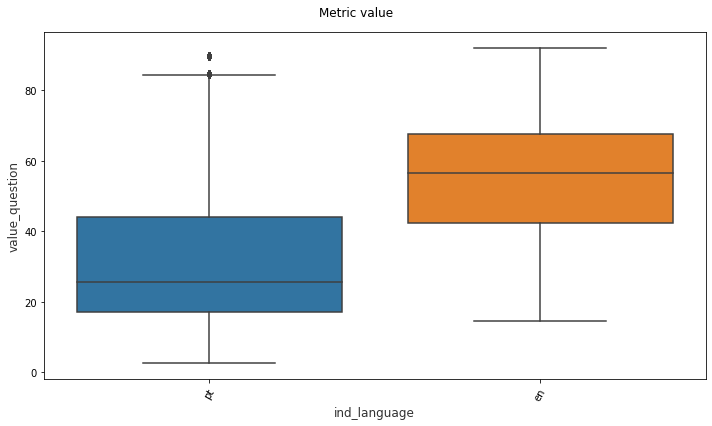

In [71]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value')

sns.boxplot(x="ind_language", y="value_question", data=df_metric_question_squad,  ax=ax)
ax.set_xlabel("ind_language",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

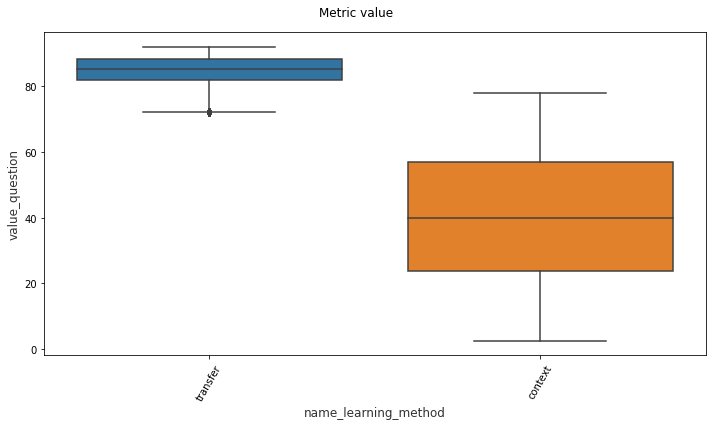

In [72]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value')

sns.boxplot(x="name_learning_method", y="value_question", data=df_metric_question_squad,  ax=ax)
ax.set_xlabel("name_learning_method",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

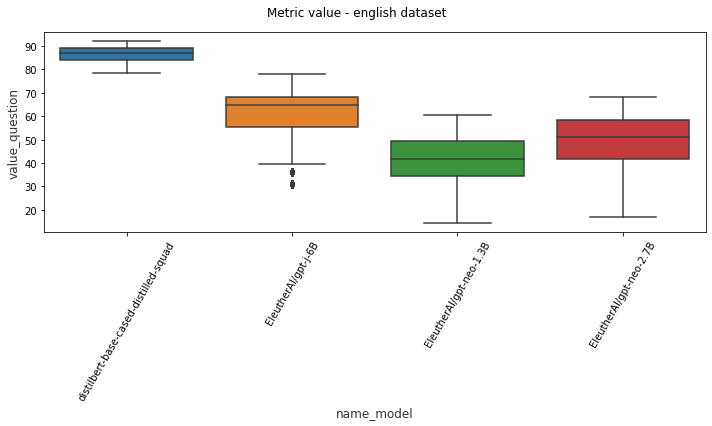

In [78]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value - english dataset')

sns.boxplot(x="name_model", y="value_question", data=df_metric_question_squad_en,  ax=ax)
ax.set_xlabel("name_model",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

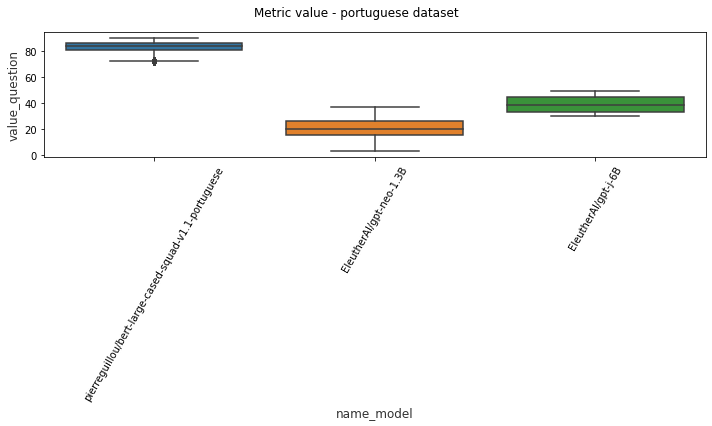

In [79]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value - portuguese dataset')

sns.boxplot(x="name_model", y="value_question", data=df_metric_question_squad_pt,  ax=ax)
ax.set_xlabel("name_model",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

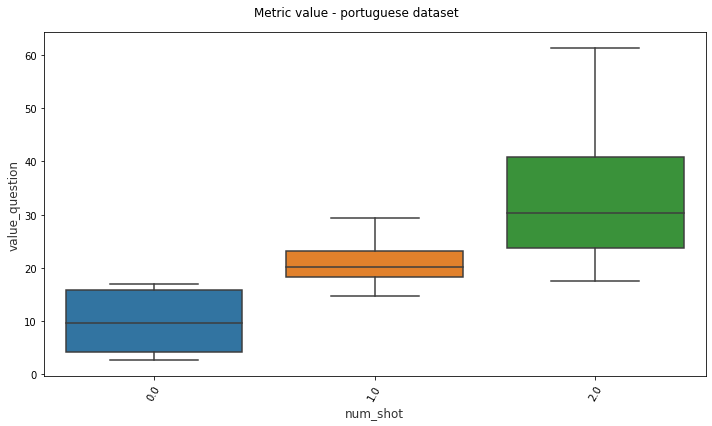

In [23]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value - portuguese dataset')

sns.boxplot(x="num_shot", y="value_question", data=df_metric_question_squad_pt,  ax=ax)
ax.set_xlabel("num_shot",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

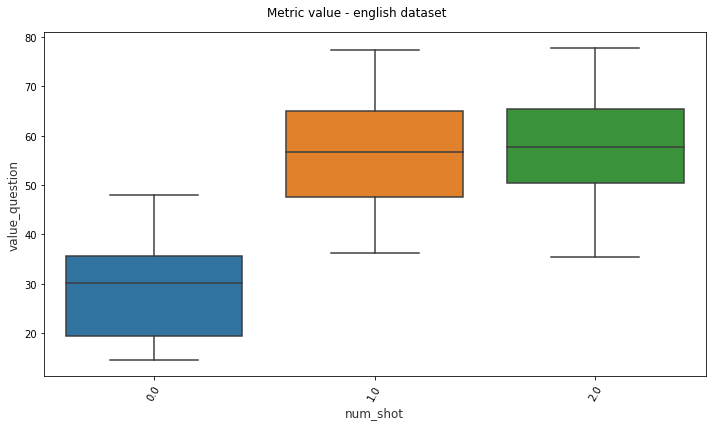

In [25]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value - english dataset')

sns.boxplot(x="num_shot", y="value_question", data=df_metric_question_squad_en,  ax=ax)
ax.set_xlabel("num_shot",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

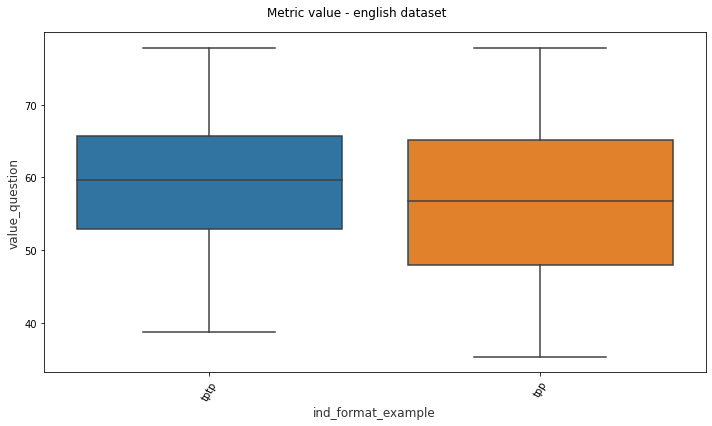

In [26]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value - english dataset')

sns.boxplot(x="ind_format_example", y="value_question", data=df_metric_question_squad_en,  ax=ax)
ax.set_xlabel("ind_format_example",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

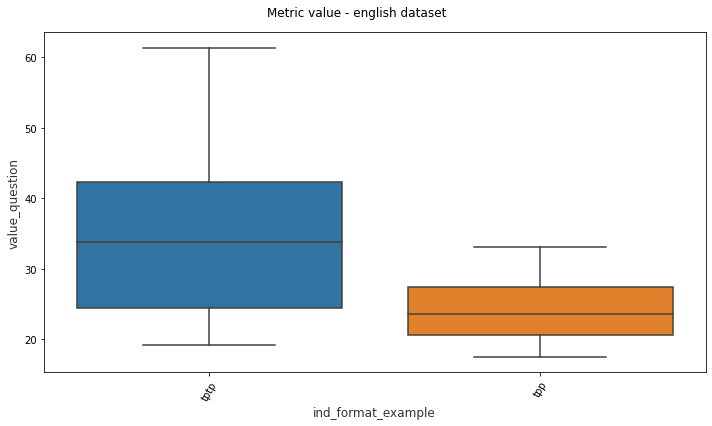

In [27]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value - portuguese dataset')

sns.boxplot(x="ind_format_example", y="value_question", data=df_metric_question_squad_pt,  ax=ax)
ax.set_xlabel("ind_format_example",size = 12,alpha=0.8)
ax.set_ylabel("value_question",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

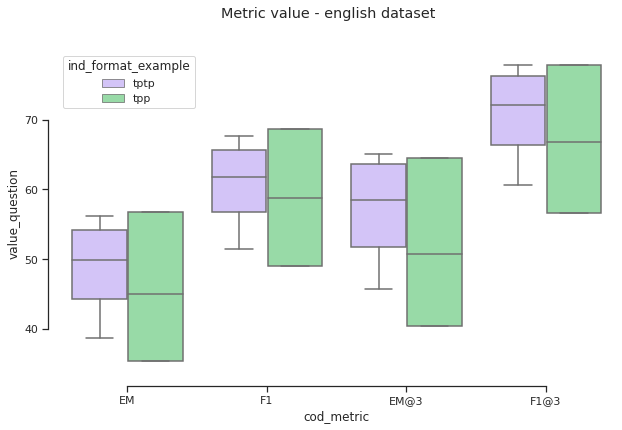

In [62]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - english dataset')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value_question",
            hue="ind_format_example", palette=["m", "g"],
            data=df_metric_question_squad_en)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

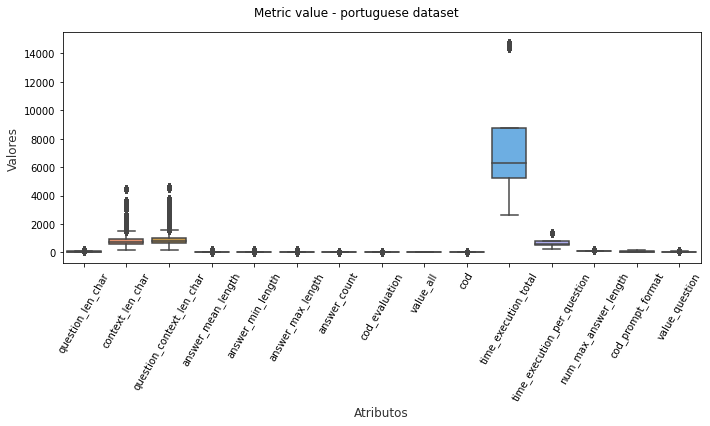

In [82]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Metric value - portuguese dataset')

sns.boxplot( data=df_metric_question_squad_pt,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

<AxesSubplot:xlabel='name_model', ylabel='value_question'>

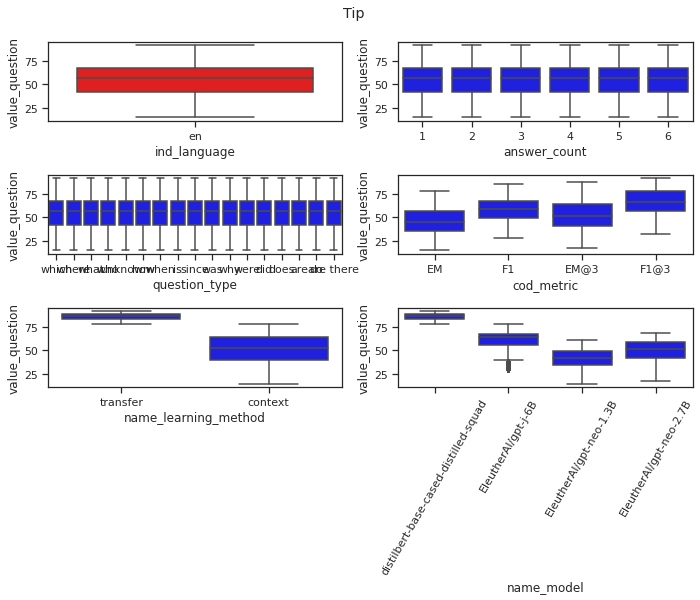

In [53]:
f, ax = plt.subplots(3, 2, figsize=figsize)
f.suptitle('Tip')
sns.boxplot(x="ind_language", y="value_question", data=df_metric_question_squad_en,  ax=ax[0,0], color='red')
plt.xticks(rotation=60)
plt.tight_layout()
sns.boxplot(x="answer_count", y="value_question", data=df_metric_question_squad_en,  ax=ax[0,1], color='blue')
# equivale a df_metric_question_squad_en.boxplot("value_question',""day",  ax=ax[0,1], color='blue')
sns.boxplot(x="question_type", y="value_question", data=df_metric_question_squad_en,  ax=ax[1,0], color='blue')
sns.boxplot(x="cod_metric", y="value_question", data=df_metric_question_squad_en,  ax=ax[1,1], color='blue')
sns.boxplot(x='name_learning_method', y="value_question", data=df_metric_question_squad_en,  ax=ax[2,0], color='blue')
sns.boxplot(x='name_model', y="value_question", data=df_metric_question_squad_en,  ax=ax[2,1], color='blue')


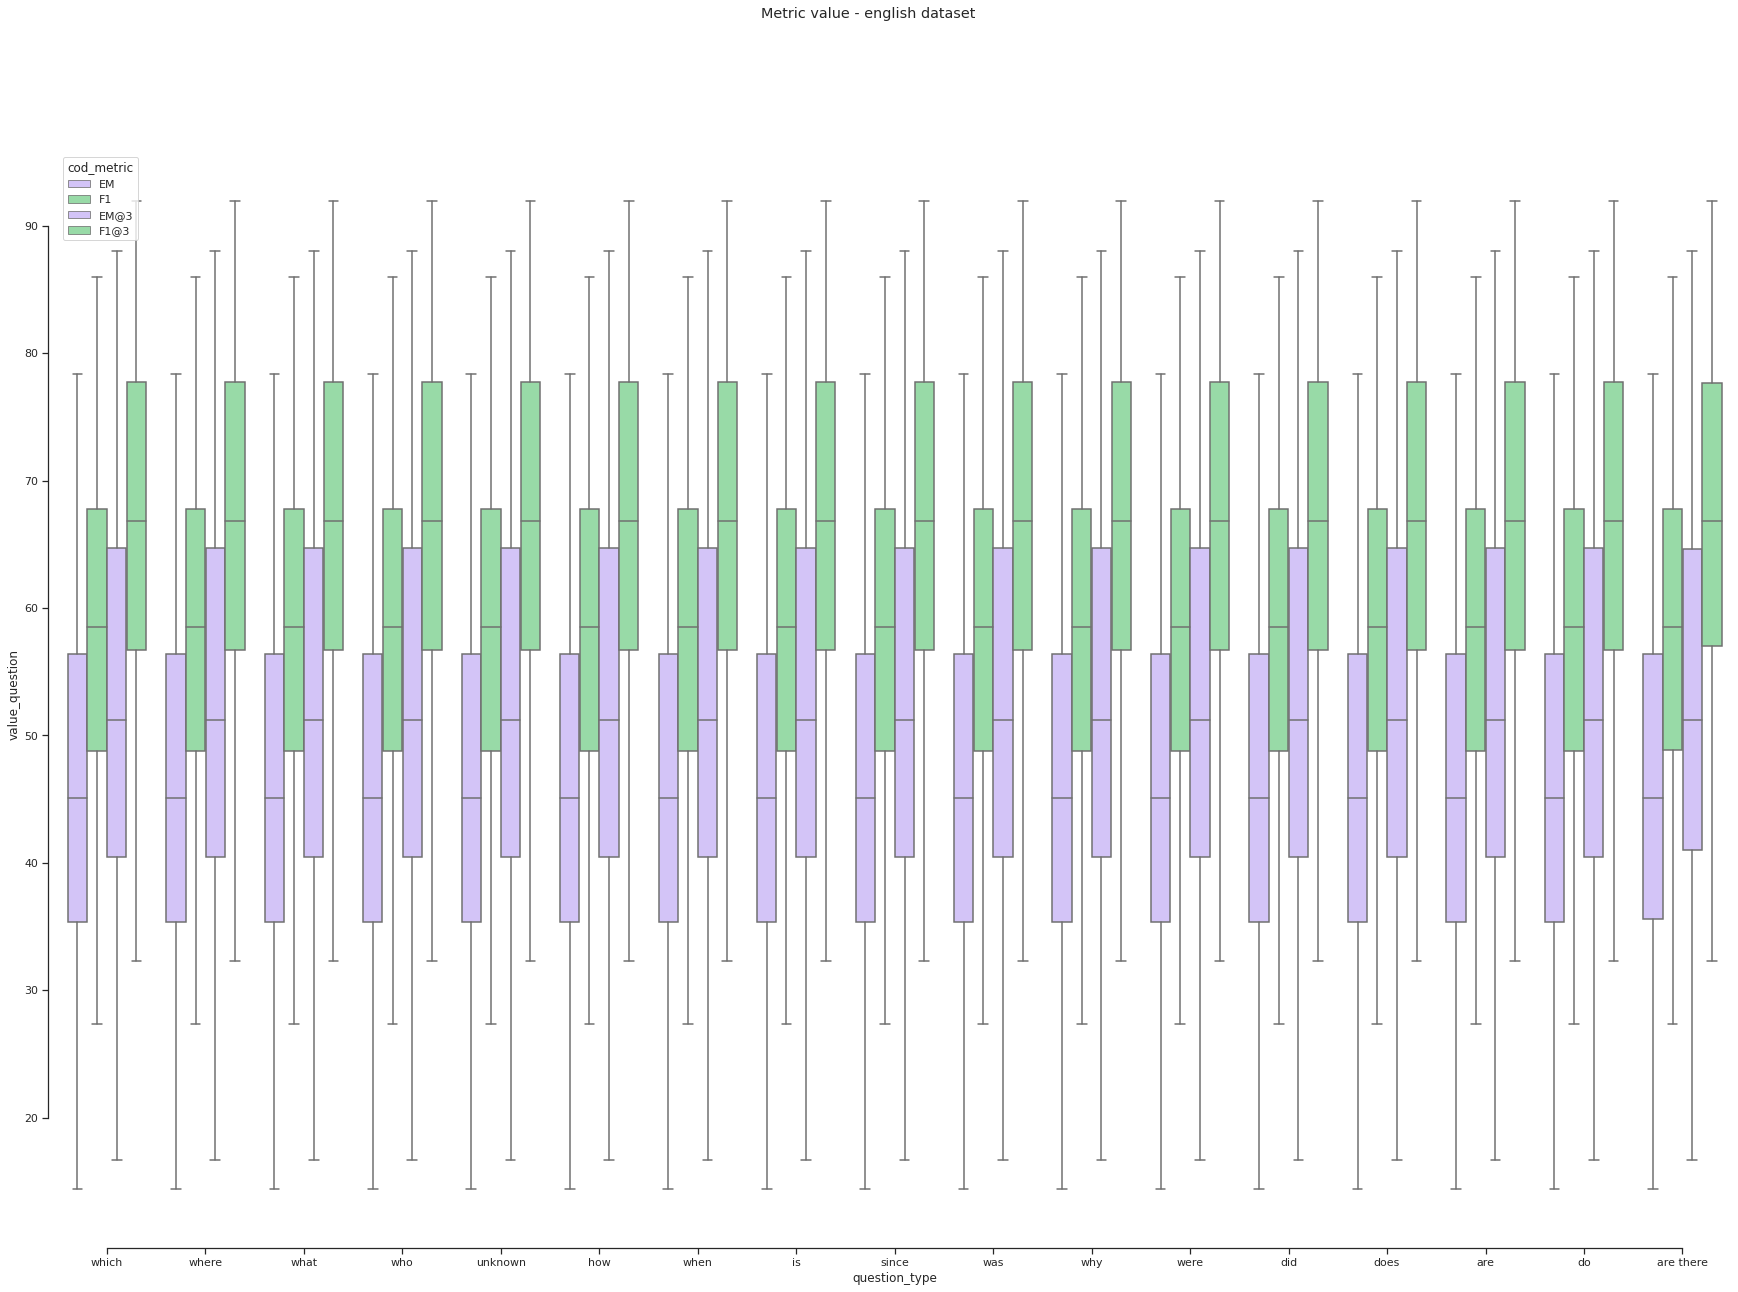

In [30]:
f, ax = plt.subplots(1, 1, figsize=(30,20))

f.suptitle('Metric value - english dataset')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="question_type", y="value_question",
            hue="cod_metric", palette=["m", "g"],
            data=df_metric_question_squad_en)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

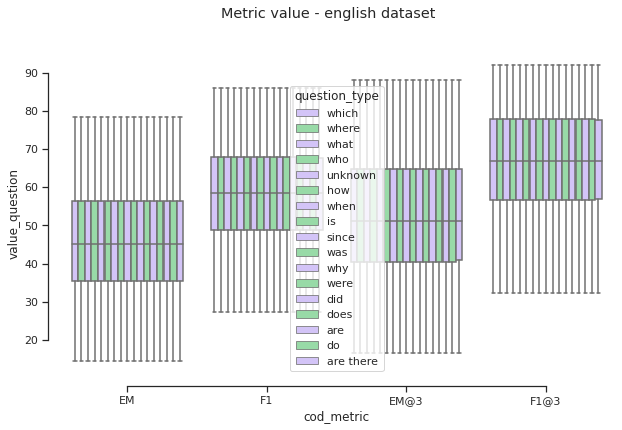

In [61]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - english dataset')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value_question",
            hue="question_type", palette=["m", "g"],
            data=df_metric_question_squad_en)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

In [33]:
df_metric_question_squad_pt.columns

Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language', 'cod_evaluation', 'cod_question', 'cod_metric',
       'value_all', 'cod', 'name_learning_method', 'name_model',
       'time_execution_total', 'time_execution_per_question',
       'num_max_answer_length', 'cod_prompt_format', 'value_question',
       'num_shot', 'ind_format_example', 'ind_language_prompt'],
      dtype='object')

In [36]:
df_metric_question_squad_pt.query('name_learning_method=="context"')

,id,question_len_char,context_len_char,question_context_len_char,question_type,answer_mean_length,answer_min_length,answer_max_length,answer_count,ind_language,cod_evaluation,cod_question,cod_metric,value_all,cod,name_learning_method,name_model,time_execution_total,time_execution_per_question,num_max_answer_length,cod_prompt_format,value_question,num_shot,ind_format_example,ind_language_prompt
8,56be4db0acb8001400a502ec,52,844,896,unknown,14.0,14,14,3,pt,30,56be4db0acb8001400a502ec,EM,0.0000,30,context,EleutherAI/gpt-neo-1.3B,14745,1395,80,1.0,2.55,0.0,None,pt
9,56be4db0acb8001400a502ec,52,844,896,unknown,14.0,14,14,3,pt,30,56be4db0acb8001400a502ec,F1,0.0000,30,context,EleutherAI/gpt-neo-1.3B,14745,1395,80,1.0,15.68,0.0,None,pt
10,56be4db0acb8001400a502ec,52,844,896,unknown,14.0,14,14,3,pt,30,56be4db0acb8001400a502ec,EM@3,0.0000,30,context,EleutherAI/gpt-neo-1.3B,14745,1395,80,1.0,2.65,0.0,None,pt
11,56be4db0acb8001400a502ec,52,844,896,unknown,14.0,14,14,3,pt,30,56be4db0acb8001400a502ec,F1@3,0.0000,30,context,EleutherAI/gpt-neo-1.3B,14745,1395,80,1.0,16.94,0.0,None,pt
12,56be4db0acb8001400a502ec,52,844,896,unknown,14.0,14,14,3,pt,31,56be4db0acb8001400a502ec,EM,0.0000,31,context,EleutherAI/gpt-neo-1.3B,5224,494,80,2.0,14.66,1.0,None,pt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422759,57379a4b1c456719005744ce,75,587,662,unknown,17.0,17,17,4,pt,37,57379a4b1c456719005744ce,F1@3,0.0909,37,context,EleutherAI/gpt-j-6B,14365,1359,80,203.0,48.79,2.0,tptp,en
422760,57379a4b1c456719005744ce,75,587,662,unknown,17.0,17,17,4,pt,38,57379a4b1c456719005744ce,EM,0.0000,38,context,EleutherAI/gpt-j-6B,10828,1024,80,103.0,40.81,2.0,tptp,en
422761,57379a4b1c456719005744ce,75,587,662,unknown,17.0,17,17,4,pt,38,57379a4b1c456719005744ce,F1,0.1739,38,context,EleutherAI/gpt-j-6B,10828,1024,80,103.0,53.37,2.0,tptp,en
422762,57379a4b1c456719005744ce,75,587,662,unknown,17.0,17,17,4,pt,38,57379a4b1c456719005744ce,EM@3,0.0000,38,context,EleutherAI/gpt-j-6B,10828,1024,80,103.0,45.90,2.0,tptp,en


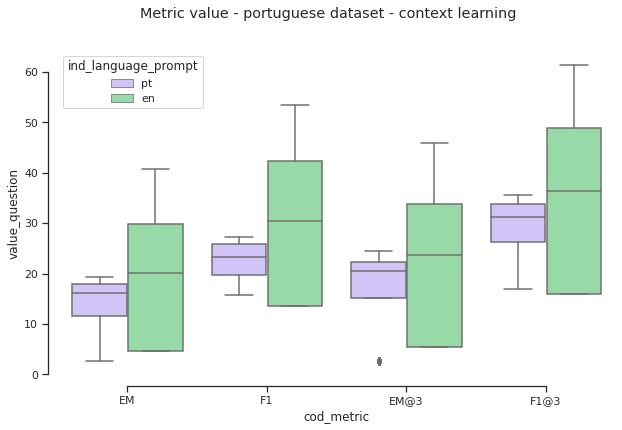

In [38]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - portuguese dataset - context learning')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value_question",
            hue="ind_language_prompt", palette=["m", "g"],
            data=df_metric_question_squad_pt.query('name_learning_method=="context"'))
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

In [48]:
df_metric_question_squad_en.columns

Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language', 'cod_evaluation', 'cod_question', 'cod_metric',
       'value_all', 'cod', 'name_learning_method', 'name_model',
       'time_execution_total', 'time_execution_per_question',
       'num_max_answer_length', 'cod_prompt_format', 'value_question',
       'num_shot', 'ind_format_example', 'ind_language_prompt'],
      dtype='object')

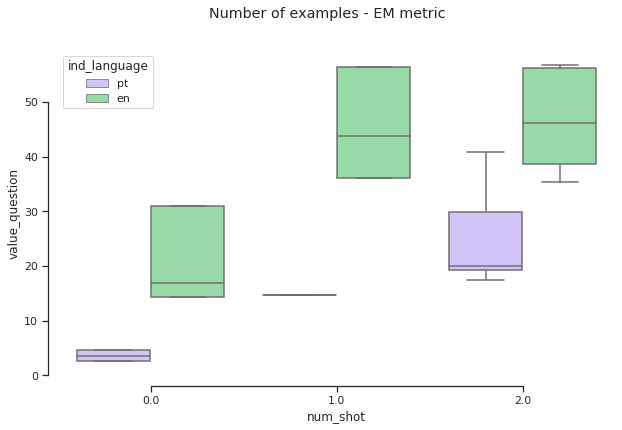

In [49]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Number of examples - EM metric')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="num_shot", y="value_question",
            hue="ind_language", palette=["m", "g"],
            data=df_metric_question_squad.query('name_learning_method=="context" and cod_metric=="EM"'))
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

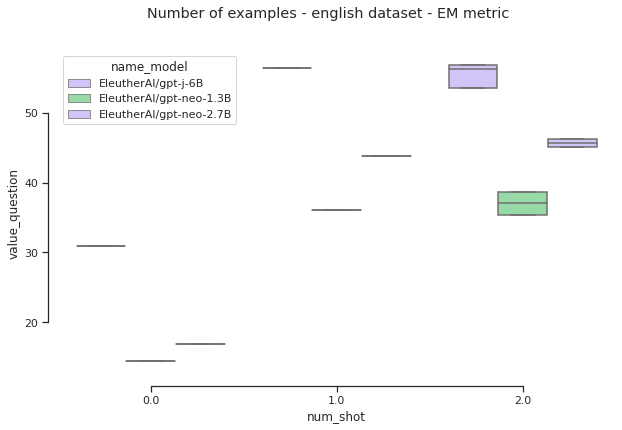

In [47]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Number of examples - english dataset - EM metric')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="num_shot", y="value_question",
            hue="name_model", palette=["m", "g"],
            data=df_metric_question_squad_en.query('name_learning_method=="context" and cod_metric=="EM"'))
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

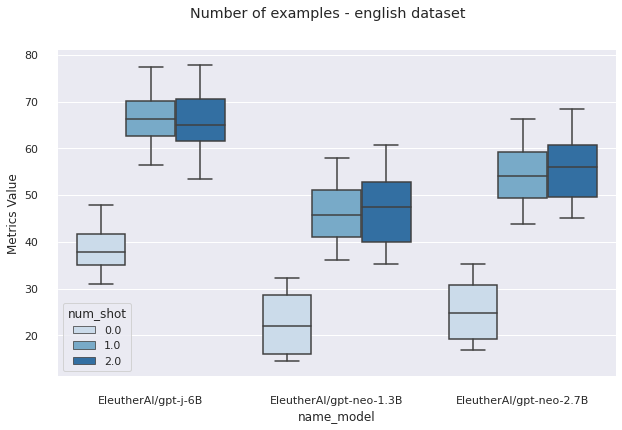

In [71]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Number of examples - english dataset')

sns.set_theme(style="ticks", palette="pastel")
sns.set(style="darkgrid")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="name_model", y="value_question",
            hue="num_shot", palette="Blues",
            data=df_metric_question_squad_en.query('name_learning_method=="context" '))
ax. set(ylabel="Metrics Value")            
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)
# boxplot_where_context_en_what_name_model_and_num_shot.png


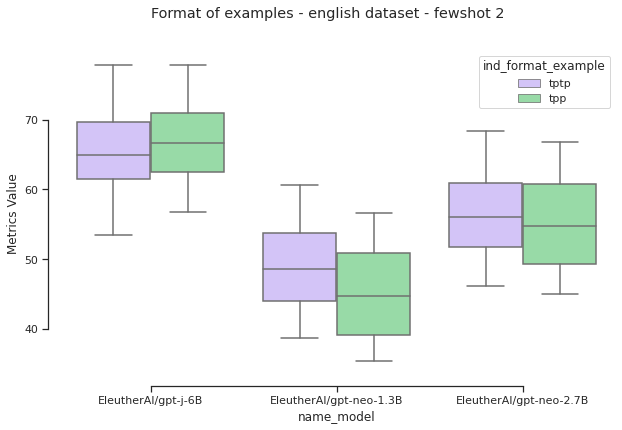

In [56]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Format of examples - english dataset - fewshot 2')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="name_model", y="value_question",
            hue="ind_format_example", palette=["m", "g"],
            data=df_metric_question_squad_en.query('name_learning_method=="context" '))
ax. set(ylabel="Metrics Value")            
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)
# boxplot_where_context_en_what_name_model_and_ind_format_example.png

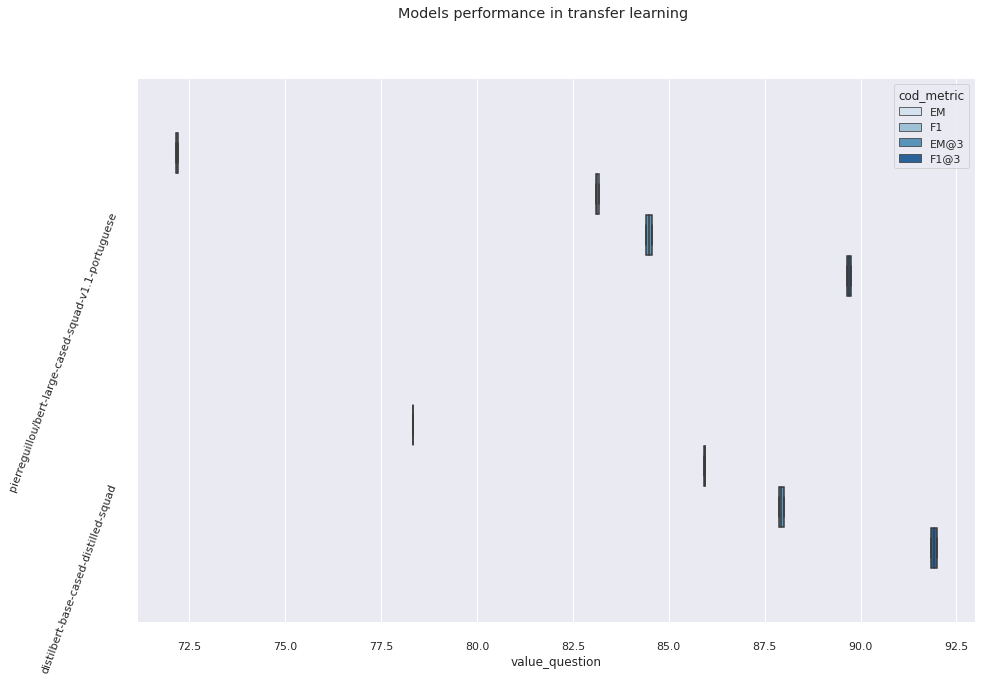

In [115]:
f, ax = plt.subplots(1, 1, figsize=(15,10))
f.suptitle('Models performance in transfer learning')

sns.set_theme(style="ticks", palette="pastel")
sns.set(style="darkgrid")
plt.xticks(rotation=60)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="value_question", y="name_model",
            hue="cod_metric", palette="Blues",
 whis=[0, 100], width=.6,
            data=df_metric_question_squad.query('name_learning_method=="transfer" '))
ax. set(ylabel="Metrics Value")            
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)
##ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
ax.tick_params(axis='y', rotation=70)
#boxplot_transfer_performance_where_transfer_what_cod_metric_and_nome_model

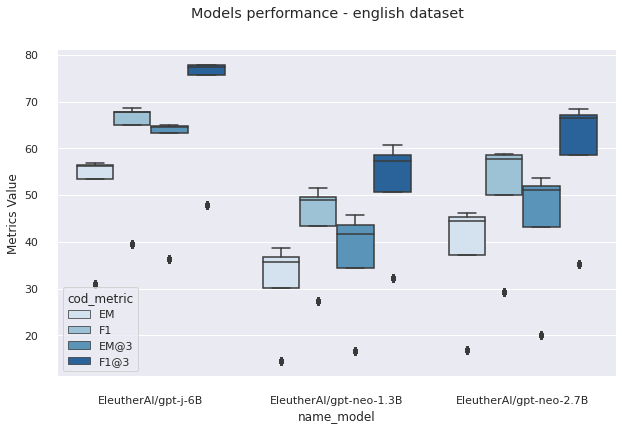

In [70]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Models performance - english dataset')

sns.set_theme(style="ticks", palette="pastel")
sns.set(style="darkgrid")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="name_model", y="value_question",
            hue="cod_metric", palette="Blues",
            data=df_metric_question_squad_en.query('name_learning_method=="context" '))
ax. set(ylabel="Metrics Value")            
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)
# boxplot_where_context_en_what_name_model_and_cod_metric.png

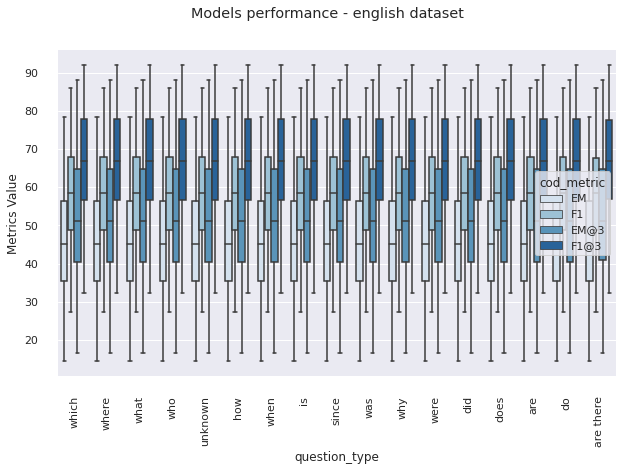

In [69]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Models performance - english dataset')

sns.set_theme(style="ticks", palette="pastel")
sns.set(style="darkgrid")
ax.tick_params(axis='x', rotation=90)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="question_type", y="value_question",
            hue="cod_metric", palette="Blues",
            data=df_metric_question_squad_en)
ax. set(ylabel="Metrics Value")            
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

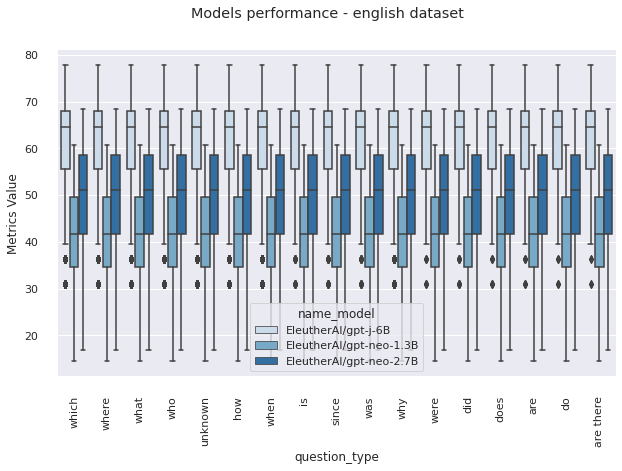

In [67]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Models performance - english dataset')

sns.set_theme(style="ticks", palette="pastel")
sns.set(style="darkgrid")
ax.tick_params(axis='x', rotation=90)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="question_type", y="value_question",
            hue="name_model", palette="Blues",
            data=df_metric_question_squad_en.query('name_learning_method=="context"'))
ax. set(ylabel="Metrics Value")            
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)
# boxplot_where_context_en_what_name_model_and_cod_metric.png

In [60]:
df_metric_question_squad.columns

Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language', 'cod_evaluation', 'cod_question', 'cod_metric',
       'value_all', 'cod', 'name_learning_method', 'name_model',
       'time_execution_total', 'time_execution_per_question',
       'num_max_answer_length', 'cod_prompt_format', 'value_question',
       'num_shot', 'ind_format_example', 'ind_language_prompt'],
      dtype='object')

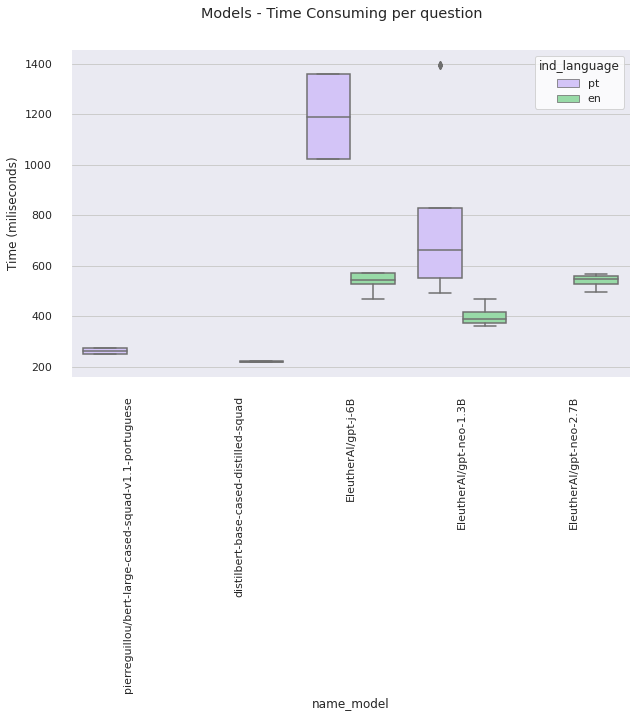

In [116]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Models - Time Consuming per question')

sns.set_theme(style="ticks", palette="pastel")
ax.tick_params(axis='x', rotation=90)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="name_model", y="time_execution_per_question",
            hue="ind_language", palette=["m", "g"],
            data=df_eval_qa_line)
ax.set(ylabel="Time (miliseconds)")            
sns.despine(offset=10, trim=True)
# boxplot_time_per_question_where_what_name_model_and_ind_languge.png

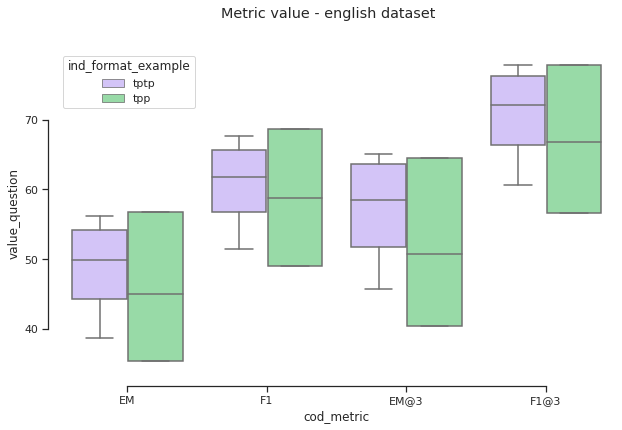

In [59]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - english dataset')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value_question",
            hue="ind_format_example", palette=["m", "g"],
            data=df_metric_question_squad_en)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

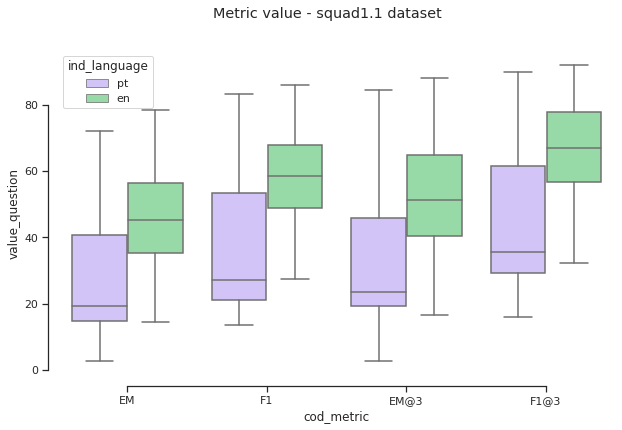

In [58]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - squad1.1 dataset')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value_question",
            hue="ind_language", palette=["m", "g"],
            data=df_metric_question_squad)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

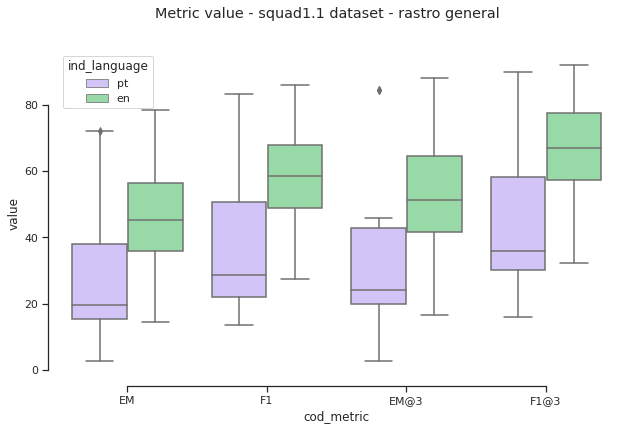

In [57]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - squad1.1 dataset - rastro general')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value",
            hue="ind_language", palette=["m", "g"],
            data=df_eval_qa_line)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

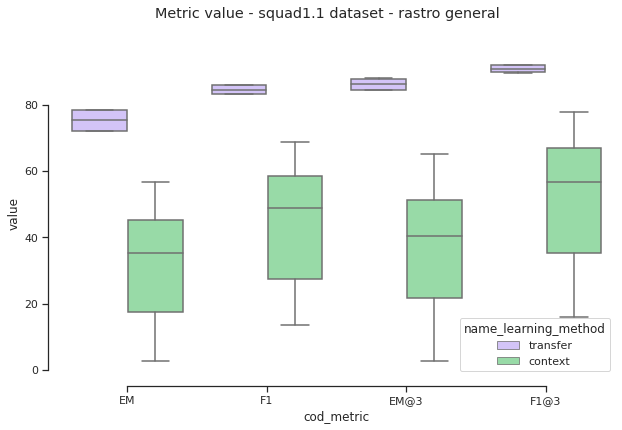

In [41]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
f.suptitle('Metric value - squad1.1 dataset - rastro general')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value",
            hue="name_learning_method", palette=["m", "g"],
            data=df_eval_qa_line)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

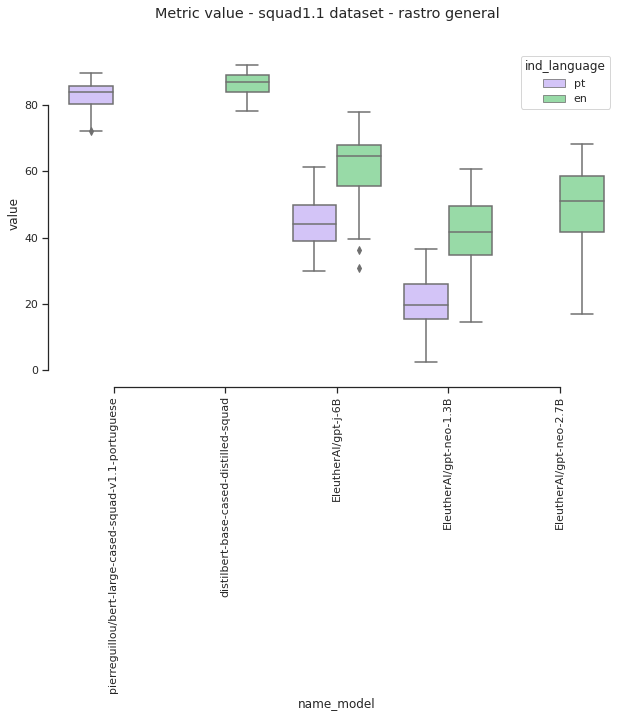

In [50]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
f.suptitle('Metric value - squad1.1 dataset - rastro general')

sns.set_theme(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
g = sns.boxplot(x="name_model", y="value",
            hue="ind_language", palette=["m", "g"],
            data=df_eval_qa_line)

ax.tick_params(axis='x', rotation=90)
  
sns.despine(offset=10, trim=True)

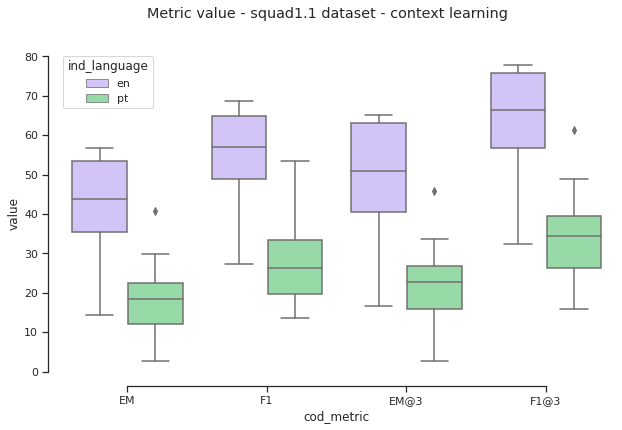

In [54]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - squad1.1 dataset - context learning')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_metric", y="value",
            hue="ind_language", palette=["m", "g"],
            data=df_eval_qa_line.query('name_learning_method == "context"'))
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

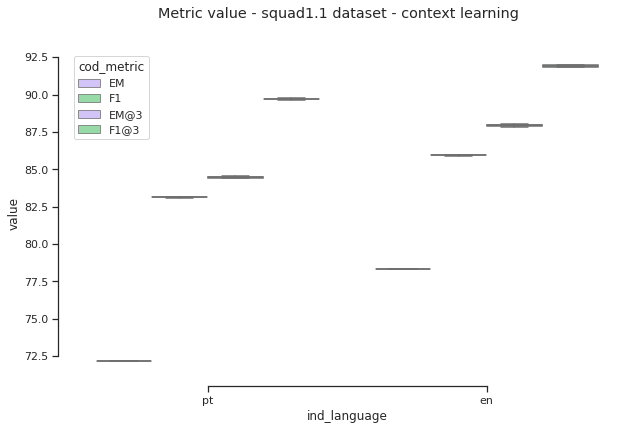

In [56]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
f.suptitle('Metric value - squad1.1 dataset - context learning')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="ind_language", y="value",
            hue="cod_metric", palette=["m", "g"],
            data=df_eval_qa_line.query('name_learning_method == "transfer"'))
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

In [114]:
df_metric_question_squad.columns

Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language', 'cod_evaluation', 'cod_question', 'cod_metric',
       'value_all', 'cod', 'name_learning_method', 'name_model',
       'time_execution_total', 'time_execution_per_question',
       'num_max_answer_length', 'cod_prompt_format', 'value_question'],
      dtype='object')

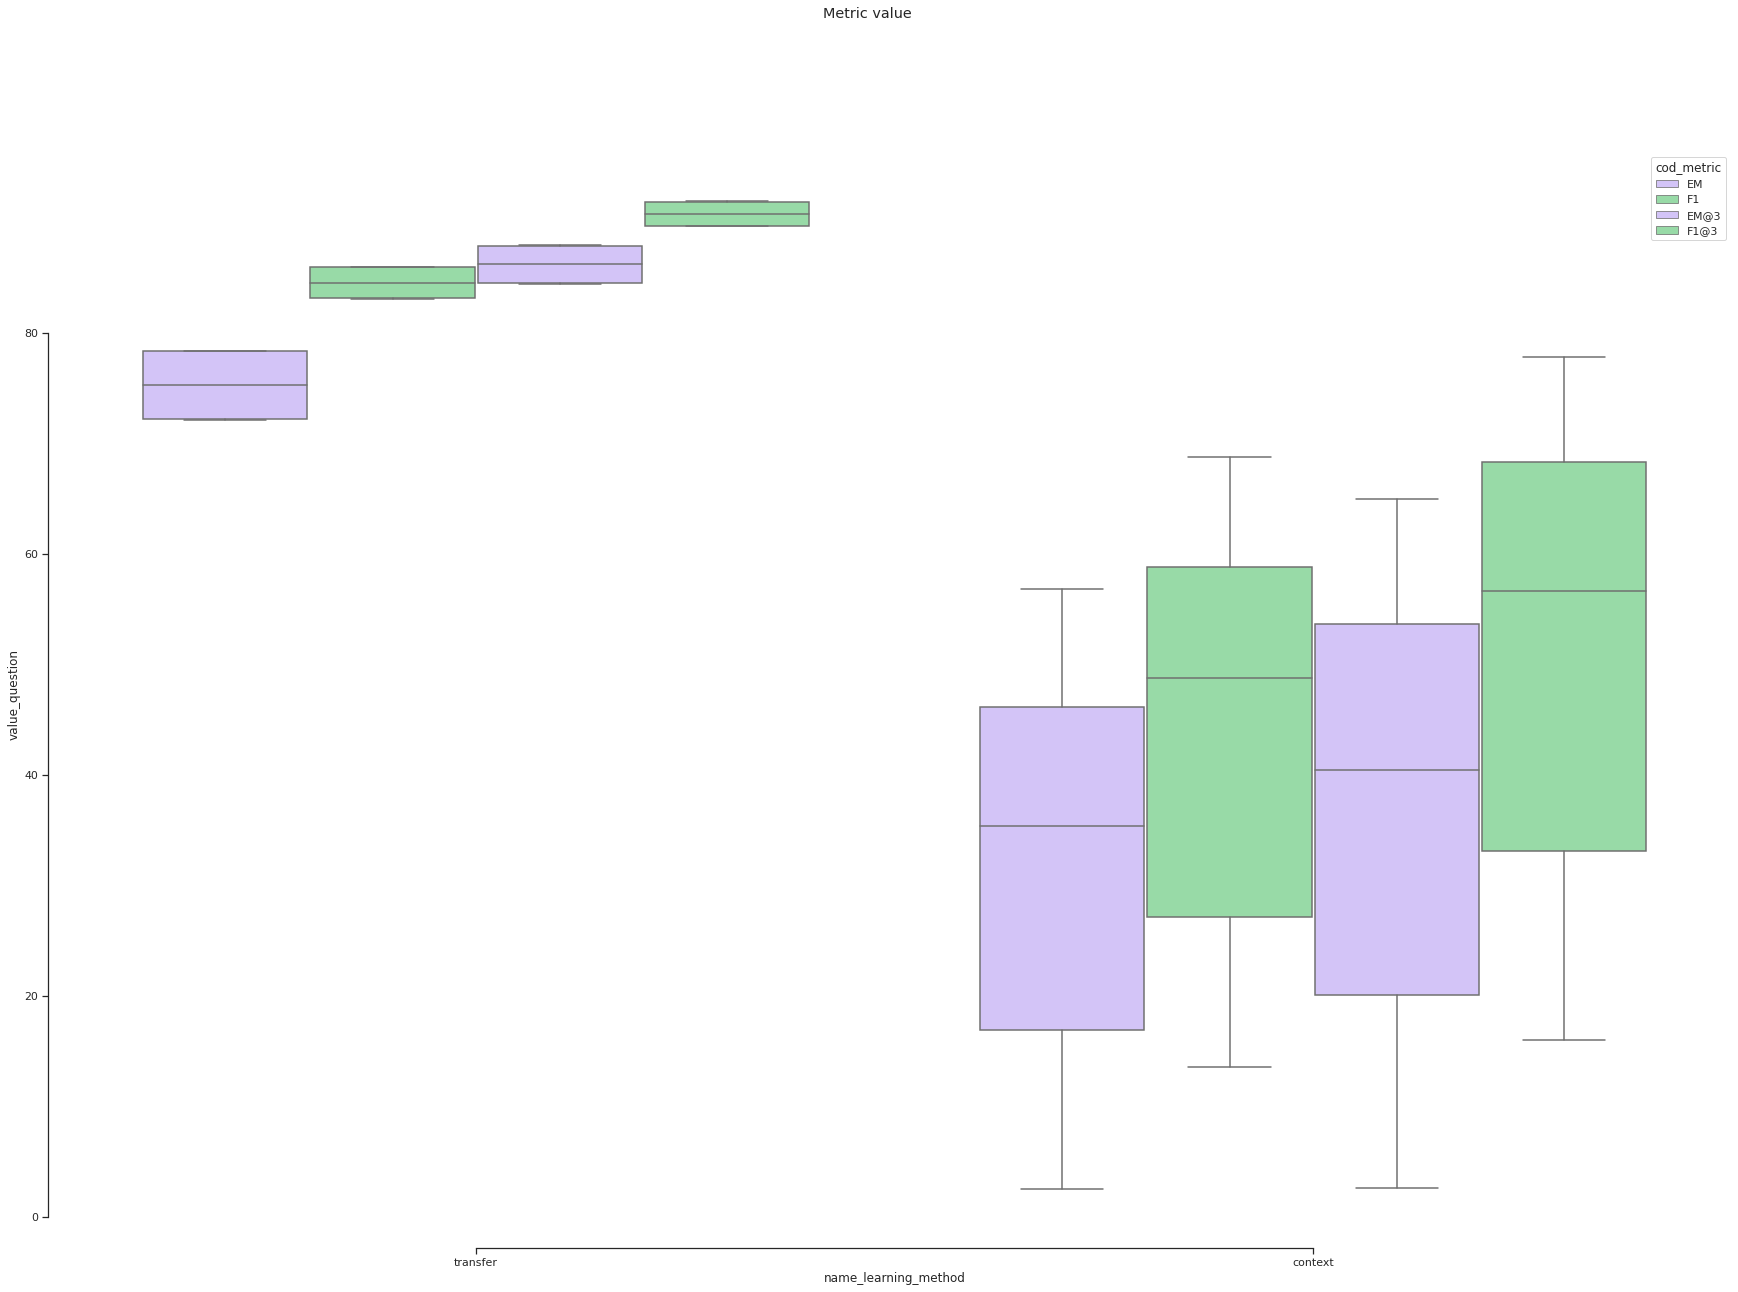

In [115]:
f, ax = plt.subplots(1, 1, figsize=(30,20))
f.suptitle('Metric value')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="name_learning_method", y="value_question",
            hue="cod_metric", palette=["m", "g"],
            data=df_metric_question_squad)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

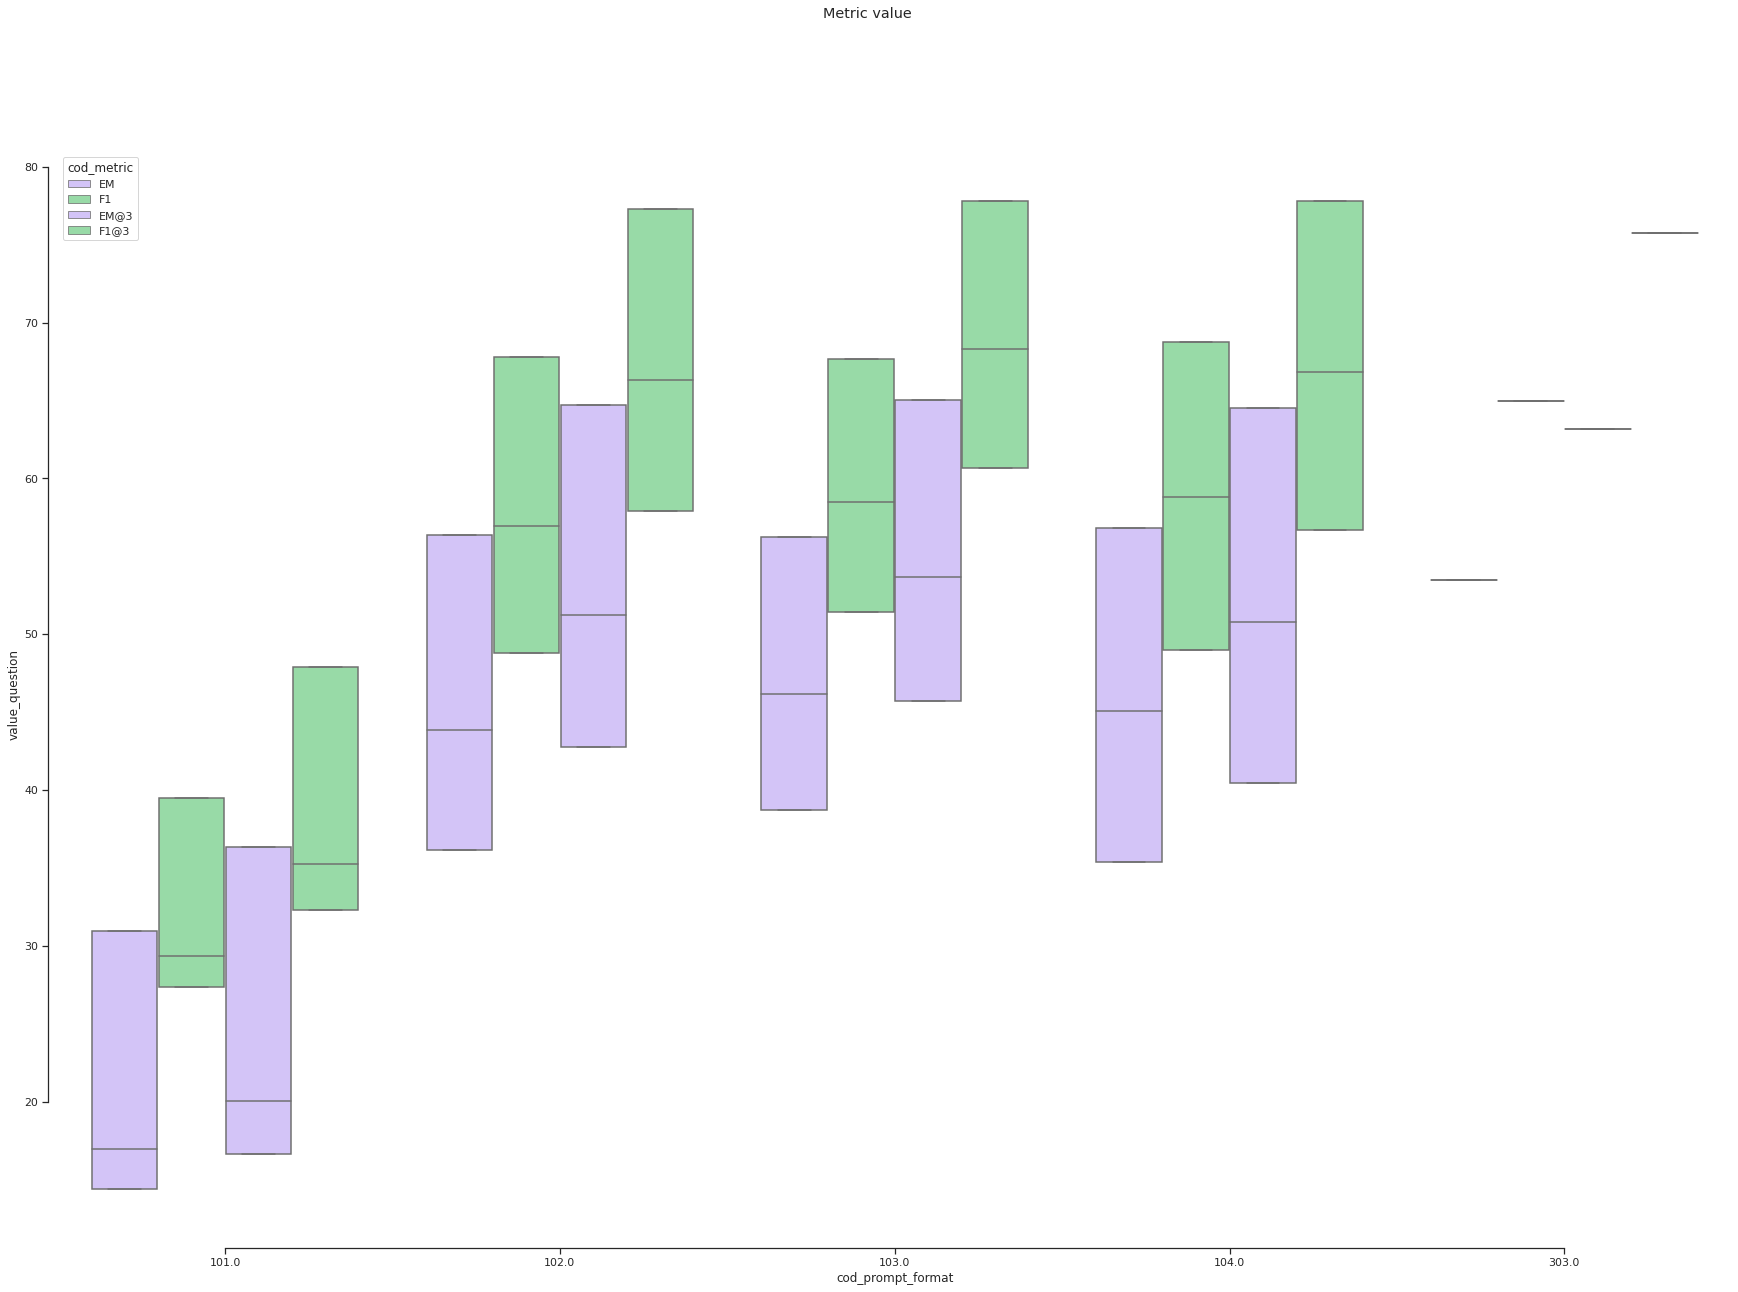

In [118]:
f, ax = plt.subplots(1, 1, figsize=(30,20))
f.suptitle('Metric value')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cod_prompt_format", y="value_question",
            hue="cod_metric", palette=["m", "g"],
            data=df_metric_question_squad_en.query('name_learning_method=="context"'))
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(30,20))
f.suptitle('Metric value')

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="name_learning_method", y="value_question",
            hue="cod_metric", palette=["m", "g"],
            data=df_metric_question_squad_en)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

In [90]:
corr = df_metric_question_squad_en.corr()

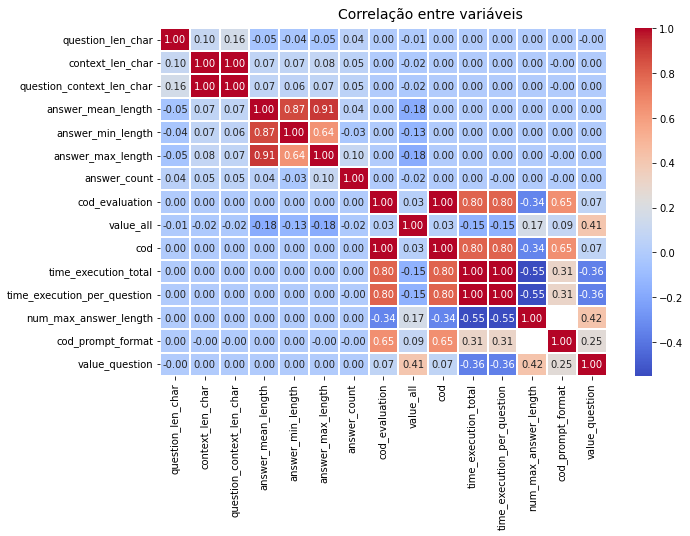

In [91]:
f, ax = plt.subplots(figsize=figsize)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

/home/borela/miniconda3/envs/exqa-complearning/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


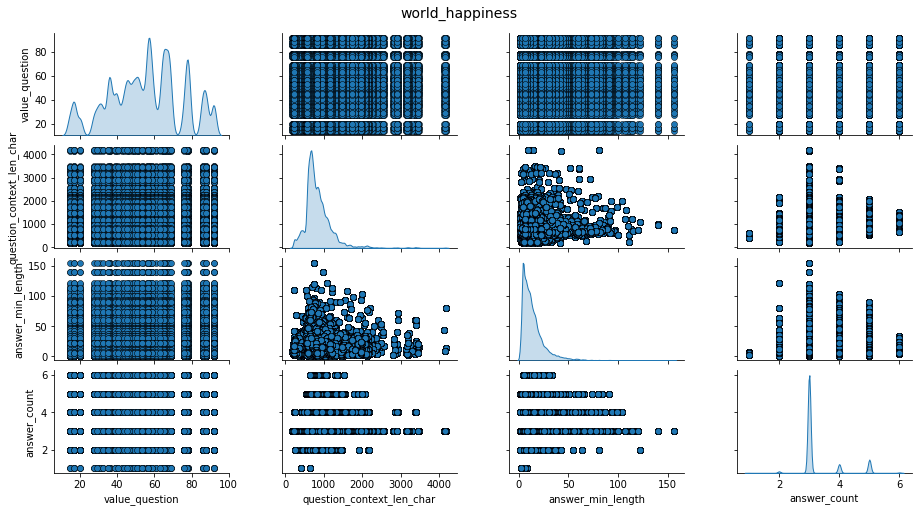

In [110]:
# Correlação entre dados

#aspect = quanto largura maior do que altura
# diag_kind = kede formato mais arredondado
pp = sns.pairplot(df_metric_question_squad_en[[ 'value_question','question_context_len_char',
       'answer_min_length', 'answer_count']], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('world_happiness', fontsize=14)

In [83]:
from pandas.plotting import parallel_coordinates


In [99]:
df_squad_en.columns


Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language'],
      dtype='object')

In [81]:
df_eval_qa_col.columns

Index(['cod', 'name_learning_method', 'ind_language', 'name_model',
       'time_execution_total', 'time_execution_per_question',
       'num_max_answer_length', 'cod_prompt_format', 'EM', 'EM@3', 'F1',
       'F1@3', 'num_shot', 'ind_format_example', 'ind_language_prompt'],
      dtype='object')

In [86]:
df_eval_qa_col['name_learning_method_name_model'] = df_eval_qa_col['name_learning_method'] + ' - ' + df_eval_qa_col['name_model']

In [89]:
df_eval_qa_col['name_learning_method_name_model_ind_language'] = df_eval_qa_col['name_learning_method'] + ' - ' + df_eval_qa_col['name_model'] + ' - ' + df_eval_qa_col['name_model'] + ' - ' + df_eval_qa_col['ind_language']

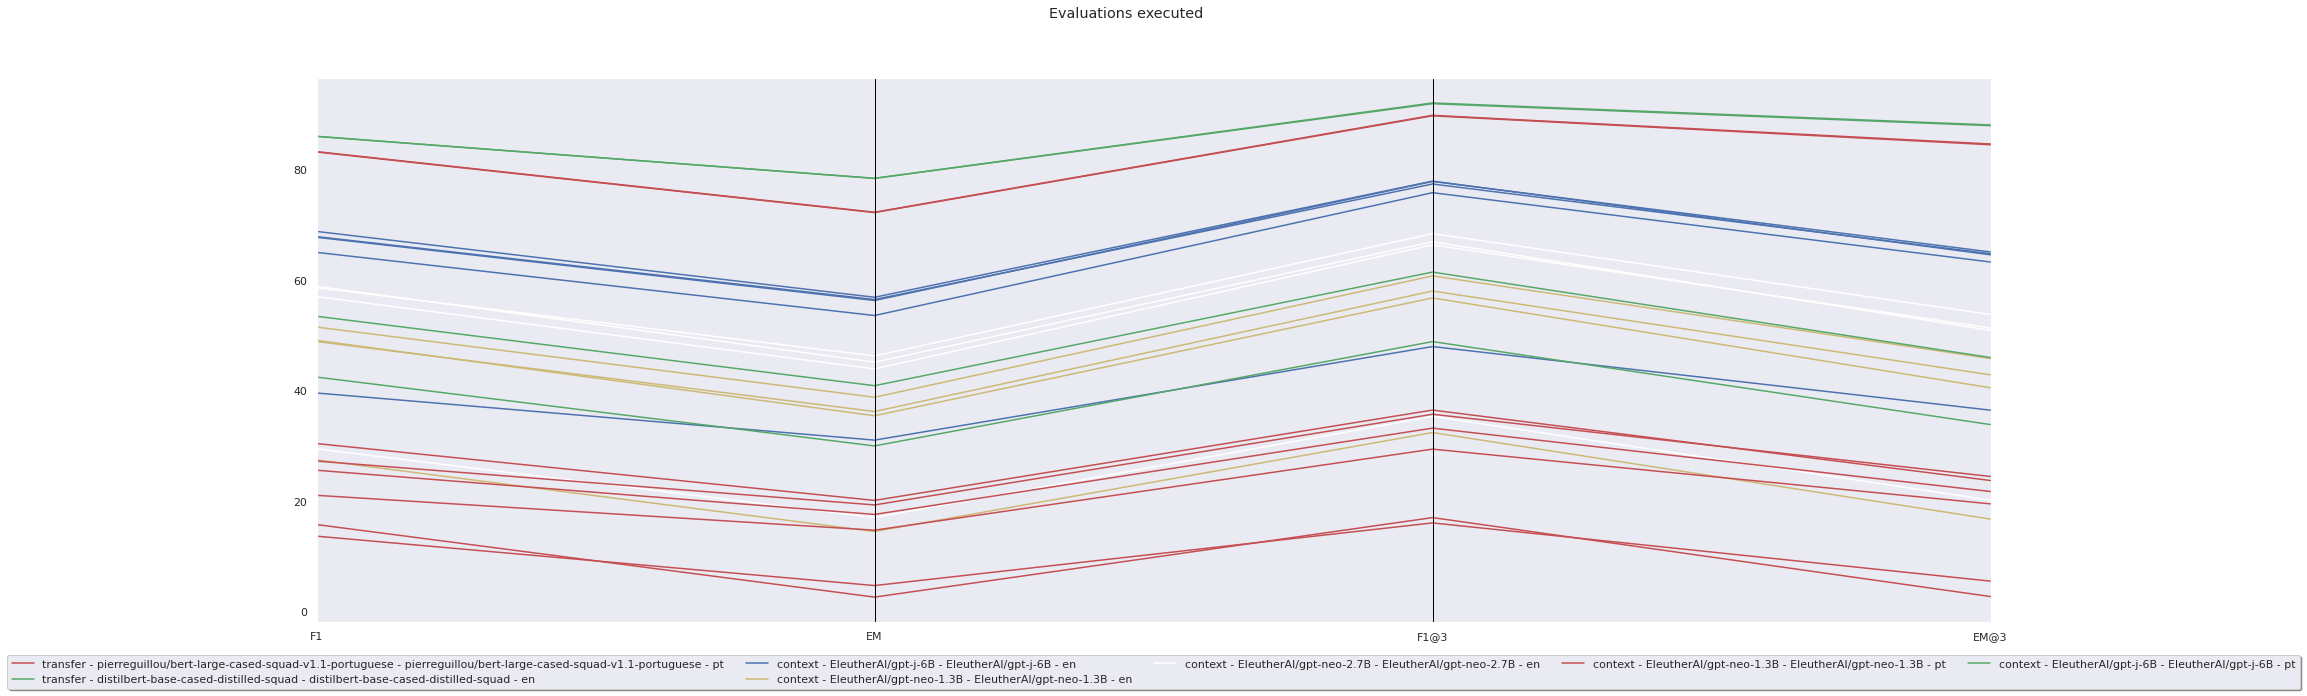

In [100]:
f, ax = plt.subplots(1, 1, figsize=(30,10))
f.suptitle('Evaluations executed')
#cada linha é um registro do meu dataframe
# mostra se existe alguma tendência de alguma categoria ter uma concentração em algum atributo
# ex confiança no governo está achatado... 
# qdo há sobreposição de cores, temos problema
parallel_coordinates(frame=df_eval_qa_col, class_column='name_learning_method_name_model_ind_language'
                     , color = ('r','g','b','y','w')
                     , colormap='viridis'
                     , ax = ax, cols=['F1','EM','F1@3', 'EM@3'])#
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

# parallel_executions_context_what_metric_and_concat.png
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
#          ncol=1, fancybox=True, shadow=True)

# plt.xticks(rotation=40)
# plt.subplots_adjust(bottom=0.30)

In [101]:
# Visão 3D dos dados

from mpl_toolkits.mplot3d import Axes3D


In [ ]:
plt.subplots(figsize=figsize)
plt.plot(range(len(df_metric_question_squad_en)), 
         df_metric_question_squad_en.loc[:,['value_question']],
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('Happiness Score')
plt.title('Plot ìndice X valor')
plt.grid(True)
plt.show()
plt.tight_layout()

In [ ]:
squad_dataset_en = squad_related.load_squad_dataset_1_1(parm_language='en')
squad_dataset_pt = squad_related.load_squad_dataset_1_1(parm_language='pt')
df_squad_en = squad_dataset_en.df
df_squad_pt = squad_dataset_pt.df


Using custom data configuration default-d2cdb99fa46933e9
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-d2cdb99fa46933e9/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 985.97it/s]
Using custom data configuration default-61eba6f0d4a86c5d
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-61eba6f0d4a86c5d/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 902.39it/s]


In [ ]:
df_squad_en['ind_language'] = 'en'
df_squad_pt['ind_language'] = 'pt'

In [ ]:
df_squad_en.drop(columns=['title','context','question','answer_start','answer_text'], axis=1, inplace=True)


In [ ]:
df_squad_en.columns


Index(['id', 'question_len_char', 'context_len_char',
       'question_context_len_char', 'question_type', 'answer_mean_length',
       'answer_min_length', 'answer_max_length', 'answer_count',
       'ind_language'],
      dtype='object')

In [ ]:
df_squad_pt.drop(columns=['title','context','question','answer_start','answer_text'], axis=1, inplace=True)

## Datasets

In [8]:
from source.data_related import rastro_evaluation_qa

In [9]:
squad_dataset_en = squad_related.load_squad_dataset_1_1(parm_language='en')
squad_dataset_pt = squad_related.load_squad_dataset_1_1(parm_language='pt')

Using custom data configuration default-d2cdb99fa46933e9
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-d2cdb99fa46933e9/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 739.87it/s]
Using custom data configuration default-61eba6f0d4a86c5d
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-61eba6f0d4a86c5d/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 1108.43it/s]


In [17]:
df_squad_en = squad_dataset_en.df
df_squad_pt = squad_dataset_en.df

In [9]:
df_squad_en.columns

NameError: name 'df_squad_en' is not defined

In [ ]:
colunas_fonte = [ 
       'question_len_char', 'context_len_char', 'question_context_len_char',
       'question_type', 'answer_mean_length', 'answer_min_length',
       'answer_max_length', 'answer_count'
]

colunas_objetivo = [ 
       'value'
]

df_x = df.loc[:,colunas_fonte] 
df_y = df.loc[:,colunas_objetivo]


world_happiness.head(35)

In [12]:
stat.describe(df_squad_en)

/home/borela/miniconda3/envs/exqa-complearning/lib/python3.7/site-packages/scipy/stats/stats.py:236: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Resultados das avaliações


In [22]:
rastro_eval_qa = rastro_evaluation_qa.RastroEvaluationQa()


In [25]:
df_eval_col = rastro_eval_qa.df_eval_metric_col

In [28]:
len(df_eval_line), len(df_eval_col)

(96, 24)

In [ ]:
rastro_eval_qa.df_calculated_metric

In [15]:
df_eval = pd.merge(left=rastro_eval_qa.df_evaluation, right=rastro_eval_qa.df_calculated_metric , left_on='cod', right_on='cod_evaluation', how='left')

In [16]:
len(df_eval)

48

In [19]:
df_eval.head(4)

,cod,name_learning_method,ind_language,name_model,name_device,descr_filter,num_question,datetime_execution,time_execution_total,time_execution_per_question,...,num_doc_stride,if_handle_impossible_answer,if_do_sample,val_length_penalty,val_temperature,cod_prompt_format,list_stop_words,cod_evaluation,cod_metric,value
0,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,EM,72.20
1,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,F1,83.17
2,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,EM@3,84.55
3,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,F1@3,89.74


In [23]:
dtype_calculated_metric_per_question = {
    'cod_evaluation':int,
    'cod_question':str,
    'cod_metric':str,
    'value':float,
}

In [24]:
df_eval_per_question = pd.read_csv('data/tab_calculated_metric_per_question.csv', sep = ',',
        header=0,
        dtype= dtype_calculated_metric_per_question,
        index_col=False)

In [25]:
for property_name, property_type in dtype_calculated_metric_per_question.items():
    if property_type in (int, float, bool):
        df_eval_per_question[property_name] = df_eval_per_question[property_name].astype(property_type)


In [26]:
df_eval_per_question.head()

,cod_evaluation,cod_question,cod_metric,value
0,14,56be4db0acb8001400a502ec,EM,1.0
1,14,56be4db0acb8001400a502ec,F1,1.0
2,14,56be4db0acb8001400a502ec,EM@3,1.0
3,14,56be4db0acb8001400a502ec,F1@3,1.0
4,14,56be4db0acb8001400a502ed,EM,1.0


In [28]:
from source.calculation.context_learning.prompt_format import dict_prompt_format, imprime_prompt_format

In [29]:
imprime_prompt_format()

Codigo: 1 Shots: 0
Instrução: Com base no texto abaixo, responda de forma sucinta à pergunta, evitando repetir palavras da pergunta:

Texto:{context}

Pergunta:{question}
Resposta:
Codigo: 101 Shots: 0
Instruction: Based on the text below, answer the question succinctly, avoiding repeating words from the question:

Text:{context}

Question:{question}
Answer:
Codigo: 2 Shots: 1
Instrução: Com base no texto abaixo, responda de forma sucinta à pergunta, evitando repetir palavras da pergunta:

Exemplo:

Texto: Marcus nasceu em 1980 e trabalha no TCU desde 2005.

Pergunta: Quem nasceu em 1980?
Resposta: Marcus

Texto:{context}

Pergunta:{question}
Resposta:
Codigo: 102 Shots: 1
Instruction: Based on the text below, answer the question succinctly, avoiding repeating words from the question:

Example:

Text: Marcus was born in 1980 and has worked at TCU since 2005.

Question: Who was born in 1980?
Answer: Marcus

Text:{context}

Question:{question}
Answer:
Codigo: 3 Shots: 2
format_example tp